### Technical Analysis on Notebooks

For technical analysis on the Blueshift Jupyter notebook interface, we start as usual by selecting the dataset

<Axes: >

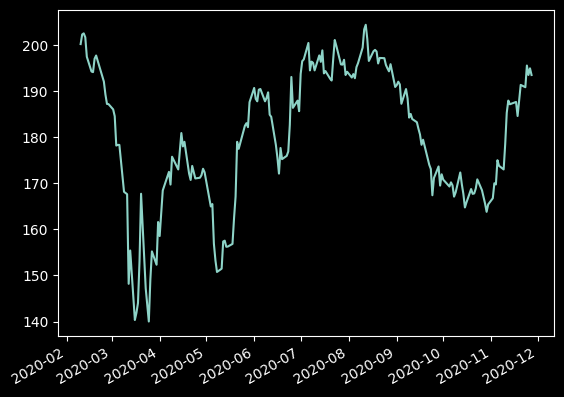

In [1]:
import matplotlib.pyplot as plt

from blueshift.research import symbol, use_dataset, history

plt.style.use('dark_background') # set the dark mode
use_dataset('nse') # select one of the names from the output of "list_datasets"

asset = symbol("ITC")
px = history(asset, ["high","low","close"], 200, "1d", dt="2020-11-30 10:30:00")

px.close.plot()

Now let's add some technical analysis to the price chart. We first import some built-in functions from the Blueshift library for the Bollinger Bands and Super Trends indicators.

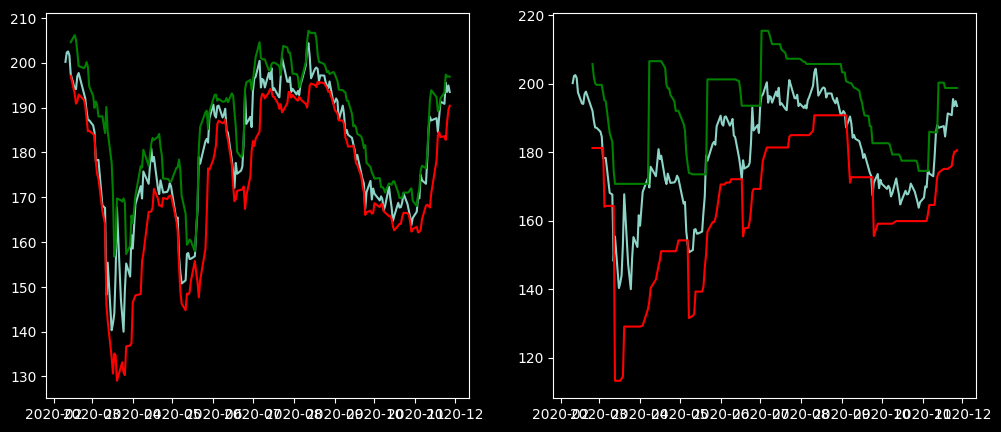

In [9]:
from blueshift.library.technicals.indicators import SUPER_TREND, BBANDS

bb_upper, bb_mid, bb_lower = BBANDS(px)
st_upper, st_lower, signal = SUPER_TREND(px)


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

axes[0].plot(px.index, px.close)
axes[0].plot(bb_upper.index, bb_upper, color='green')
axes[0].plot(bb_lower.index, bb_lower, color='red')

axes[1].plot(px.index, px.close)
axes[1].plot(st_upper.index, st_upper, color='green')
axes[1].plot(st_lower.index, st_lower, color='red')

Note that, we are using the indicators CAPITAL lettered functions. This gives us a timeseries. In strategy, in most cases we will require the last computation. In such cases, we use the lowecase versions. 

Apart from built-in indicators, you can also import the ``talib`` library. In adiition, some advanced functionalities are also available. Below shows a couple of examples - namely change point detection and perceptually important points (PIPs). The function ``find_trends`` determines the recent trends in the price series (based on either price level or change in variance). This is usefull to detect a change in price trends. The function ``find_imp_points`` takes in a price series and automatically detect a series of maximas and minimas that would be identified as highs and lows by a human.

C:\Users\prodi\AppData\Local\Temp\ipykernel_8312\2882286688.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mins, maxes, points= find_imp_points(px.close, R=1.01)


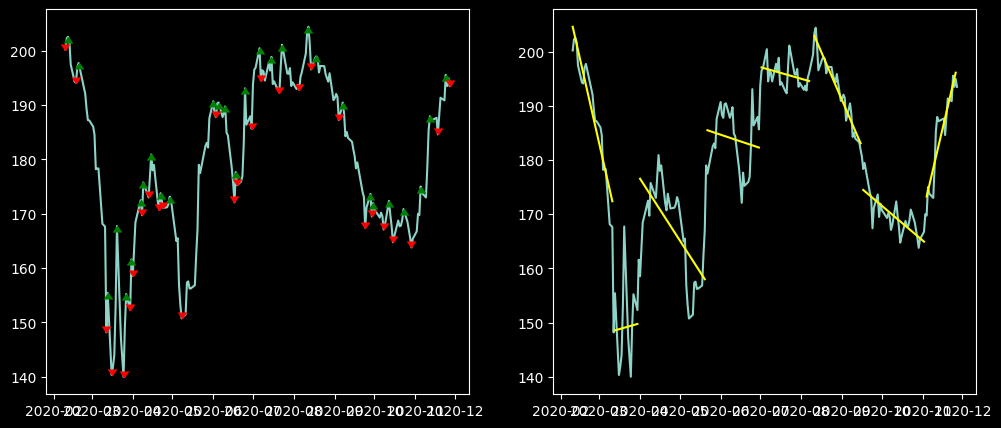

In [2]:
from blueshift.library.statistical import find_trends, find_imp_points

lines = find_trends(px.close)

mins, maxes, points= find_imp_points(px.close, R=1.01)
highs = points[points.sign==1]
lows = points[points.sign==-1]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

axes[0].plot(px.index, px.close)
axes[0].plot(highs.index, highs.value, linestyle='None', marker=6, color='green')
axes[0].plot(lows.index, lows.value, linestyle='None', marker=7, color='red')

axes[1].plot(px.index, px.close)
for item in lines:
    line = item.line
    axes[1].plot(line.index, line, color="yellow")

For more built-in functions, check the documentation on the Blueshift library.